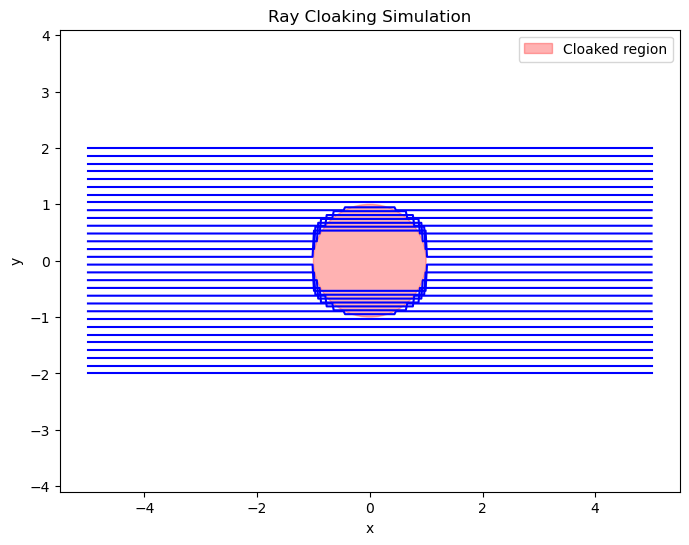

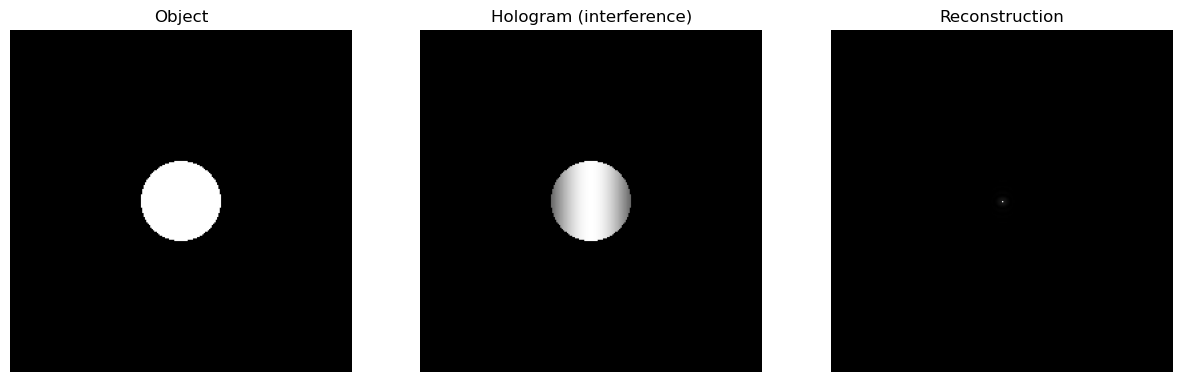

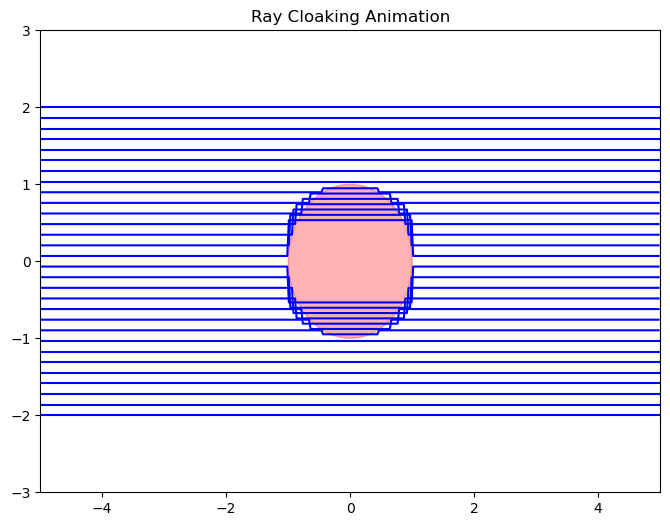

All simulations done! Images and animation saved.


In [1]:
   #Demonstrates how light rays bend around an object (cloaking)
  #  and how holography can digitally reconstruct hidden objects.


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# 1. Ray Cloaking Simulation

def simulate_rays(N_rays=30, cloak_radius=1.0, length=5.0):
    
    #Simulate parallel rays bending around a circular cloaked region.
    
    y0 = np.linspace(-2, 2, N_rays)   # initial ray positions
    x_vals = np.linspace(-length, length, 400)
    rays = []

    for y in y0:
        path_x, path_y = [], []
        for x in x_vals:
            r = np.sqrt(x**2 + y**2)
            if r < cloak_radius:  # bend ray outward if inside cloak
                y_new = np.sign(y) * (cloak_radius + (abs(y) - cloak_radius) * 0.5)
            else:
                y_new = y
            path_x.append(x)
            path_y.append(y_new)
        rays.append((path_x, path_y))
    return rays

def plot_rays(rays, cloak_radius, save=True):
    fig, ax = plt.subplots(figsize=(8, 6))
    for x, y in rays:
        ax.plot(x, y, 'b')
    circle = plt.Circle((0, 0), cloak_radius, color='red', alpha=0.3, label="Cloaked region")
    ax.add_artist(circle)
    ax.set_title("Ray Cloaking Simulation")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    ax.axis("equal")
    if save:
        plt.savefig("refraction_cloak_ray_demo.png", dpi=300)
    plt.show()


# 2. Digital Holography Simulation

def simulate_hologram(N=256, obj_radius=30):
    
#Simulate hologram formation of a circular object with reference wave.
    
    x = np.linspace(-1, 1, N)
    X, Y = np.meshgrid(x, x)
    obj = np.zeros((N, N))
    mask = X**2 + Y**2 < (obj_radius/N)**2 * 4
    obj[mask] = 1.0

#Reference wave
    ref = np.exp(1j * 2 * np.pi * X)

#Interference pattern (hologram intensity)
    holo = np.abs(obj + ref)**2
    return obj, ref, holo

def reconstruct_hologram(holo):
    
#Reconstruct object field from hologram using Fourier transform.
    
    F = np.fft.fftshift(np.fft.fft2(holo))
    recon = np.abs(F)
    return recon

def plot_hologram(obj, holo, recon, save=True):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(obj, cmap="gray")
    axs[0].set_title("Object")
    axs[1].imshow(holo, cmap="gray")
    axs[1].set_title("Hologram (interference)")
    axs[2].imshow(recon, cmap="gray")
    axs[2].set_title("Reconstruction")
    for ax in axs: ax.axis("off")
    if save:
        plt.savefig("hologram_camouflage_panels.png", dpi=300)
    plt.show()


#Animation of Rays

def animate_rays(rays, cloak_radius):
    fig, ax = plt.subplots(figsize=(8, 6))
    circle = plt.Circle((0, 0), cloak_radius, color='red', alpha=0.3)
    ax.add_artist(circle)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-3, 3)
    ax.set_title("Ray Cloaking Animation")

    lines = [ax.plot([], [], 'b')[0] for _ in rays]

    def init():
        for line in lines:
            line.set_data([], [])
        return lines

    def update(frame):
        for i, (x, y) in enumerate(rays):
            lines[i].set_data(x[:frame], y[:frame])
        return lines

    ani = FuncAnimation(fig, update, frames=len(rays[0][0]), init_func=init,
                        blit=True, interval=20)
    ani.save("ray_cloak_animation.mp4", writer="ffmpeg", dpi=200)
    plt.show()


# Main Execution

if __name__ == "__main__":
# Part 1: Rays 
    rays = simulate_rays()
    plot_rays(rays, cloak_radius=1.0)

#  Part 2: Holography 
    obj, ref, holo = simulate_hologram()
    recon = reconstruct_hologram(holo)
    plot_hologram(obj, holo, recon)

# Part 3: Animation
    animate_rays(rays, cloak_radius=1.0)

    print("All simulations done! Images and animation saved.")
